# Практика 01. Парсинг

### Зачем собирать данные автоматически?

### HTTP протокол

**HTTP** расшифровывается как *HyperText Transfer Protocol* — протокол передачи гипертекста


HTTP использует при работе клиент-серверную модель. В ней участвуют клиент и сервер.

Обмен информацией осуществляется по следующему принципу:
*   Клиент формирует запрос на некоторый ресурс и отправляет его на сервер
*   Сторона сервера принимает запрос. На этом этапе происходит обработка поданной «команды»
*   Серверная сторона возвращает клиенту ресурс, который был запрошен изначально

Данные между клиентом и сервером в рамках работы протокола передаются с помощью HTTP-сообщений. Они бывают двух видов:
*   **Запросы** (HTTP Requests)
*   **Ответы** (HTTP Responses)


Запросы и ответы имеют следующую структуру:
*   Стартовая строка
*   HTTP-заголовки
*   Пустая строка
*   Тело сообщения (опционально)



#### HTTP-запрос

**Методы HTTP-запроса**

*   GET
*   POST
*   HEAD
*   PUT
*   DELETE
*   OPTIONS
*   PATCH



#### HTTP-ответ

**Коды состояния**

*   1xx
*   2xx
*   3xx
*   4xx
*   5xx


**Распространенные коды ответов**

*   200 OK
*   302 Found
*   400 Bad Request
*   403 Forbidden
*   404 Not Found
*   500 Internal Error



### Что такое HTML?

**HTML (HyperText Markup Language)**  — это такой же язык разметки как Markdown или LaTeX. Он является стандартным для написания различных сайтов. Команды в таком языке называются **тегами**. Если открыть любой сайт, нажать на правую кнопку мышки, а после нажать `View page source`, то перед вами предстанет HTML скелет этого сайта.

Вот так можно открыть html-код стартовой яндекса, найти в нём новость из топа и немного её изменить. Понятное дело, что вы так меняете html-страничку только на своём компьютере (клиенте). На сервере яндекса остаётся исходная версия. Когда вы обновите страничку все правки исчезнут. Однако никто вам не запрещает ворваться на VK в какую-нибудь переписку, открыть её код, поменять текст нескольких сообщений и наделать скринов для мемов.


HTML-страница это ни что иное, как набор вложенных тегов. Можно заметить, например, следующие теги:

- `<title>` – заголовок страницы
- `<h1>…<h6>` – заголовки разных уровней
- `<p>` – абзац (paragraph)
- `<div>` – выделения фрагмента документа с целью изменения вида содержимого
- `<table>` – прорисовка таблицы
- `<tr>` – разделитель для строк в таблице
- `<td>` – разделитель для столбцов в таблице
- `<b>` – устанавливает жирное начертание шрифта

Обычно команда `<...>` открывает тег, а  `</...>` закрывает его. Все, что находится между этими двумя командами, подчиняется правилу, которое диктует тег. Например, все, что находится между `<p>` и  `</p>` — это отдельный абзац.   

Теги образуют своеобразное дерево с корнем в теге `<html>` и разбивают страницу на разные логические кусочки. У каждого тега есть свои потомки (дети) — те теги, которые вложены в него и свои родители.

Например, HTML-древо страницы может выглядеть вот так:


````
<html>
<head> Заголовок </head>
<body>
    <div>
        Первый кусок текста со своими свойствами
    </div>
    <div>
        Второй кусок текста
            <b>
                Третий, жирный кусок
            </b>
    </div>
    Четвёртый кусок текста
</body>
</html>
````

Можно работать с этим html как с текстом, а можно как с деревом. Обход этого дерева и есть парсинг веб-страницы. Мы всего лишь будем находить нужные нам узлы среди всего этого разнообразия и забирать из них информацию.

## Библиотека `requests`

Доступ к веб-станицам позволяет получать модуль `requests`. Подгрузим его.

Если у вас не установлен этот модуль, то сделайте это командой:  
`pip install requests`.

In [1]:
# !pip install requests

In [2]:
import requests

### GET, POST и т.д.

In [3]:
response = requests.get('https://httpbin.org/')

In [4]:
response.status_code

200

In [5]:
if response.status_code == 200:
    print('Success!')
elif response.status_code == 404:
    print('Not Found.')

Success!


In [6]:
response = requests.post('https://httpbin.org/post', data = {'key':'value'})

if response:
    print('Success!')
else:
    print('An error has occurred.')

Success!


In [7]:
payload = {'key1': 'value1', 'key2': 'value2'}

response = requests.get('https://httpbin.org/get', params=payload)
print(response.url)

https://httpbin.org/get?key1=value1&key2=value2


In [8]:
requests.put('https://httpbin.org/put', data={'key':'value'})
requests.delete('https://httpbin.org/delete')
requests.head('https://httpbin.org/get')
requests.patch('https://httpbin.org/patch', data={'key':'value'})
requests.options('https://httpbin.org/get')

<Response [200]>

### Содержимое ответа

In [9]:
response = requests.get('https://api.hh.ru/')
response.text

'<!DOCTYPE html><html lang=en><meta charset=utf-8><meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width"><title>Error 403</title><style>*{margin:0;padding:0}html{font:15px/22px arial,sans-serif;background: #fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}p{margin:11px 0 22px;overflow :hidden}ins{color:#777;text-decoration :none;}</style><p><b>403 - Forbidden .</b> <ins>That’s an error.</ins><p>Client does not have access rights to the content so server is rejecting to give proper response.  <ins>That’s all we know.</ins>'

In [10]:
response.encoding

'utf-8'

In [11]:
response.content

b'<!DOCTYPE html><html lang=en><meta charset=utf-8><meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width"><title>Error 403</title><style>*{margin:0;padding:0}html{font:15px/22px arial,sans-serif;background: #fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}p{margin:11px 0 22px;overflow :hidden}ins{color:#777;text-decoration :none;}</style><p><b>403 - Forbidden .</b> <ins>That\xe2\x80\x99s an error.</ins><p>Client does not have access rights to the content so server is rejecting to give proper response.  <ins>That\xe2\x80\x99s all we know.</ins>'

In [12]:
# response.json()

In [13]:
response = requests.get('https://api.hh.ru/employers')
response.json()
#response.json().keys()

{'items': [{'id': '9140614',
   'name': '野马丝路文化有限公司',
   'url': 'https://api.hh.ru/employers/9140614',
   'alternate_url': 'https://hh.ru/employer/9140614',
   'logo_urls': None,
   'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=9140614',
   'is_identified_by_esia': False,
   'open_vacancies': 0},
  {'id': '10914064',
   'name': '金牛区忠义发建材经营部',
   'url': 'https://api.hh.ru/employers/10914064',
   'alternate_url': 'https://hh.ru/employer/10914064',
   'logo_urls': None,
   'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=10914064',
   'is_identified_by_esia': False,
   'open_vacancies': 0},
  {'id': '11099814',
   'name': '大连赛维德诺信息技术有限公司',
   'url': 'https://api.hh.ru/employers/11099814',
   'alternate_url': 'https://hh.ru/employer/11099814',
   'logo_urls': None,
   'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=11099814',
   'is_identified_by_esia': False,
   'open_vacancies': 0},
  {'id': '11550164',
   'name': '广州中臣碧阳科技集团有限公司',
   'url': 'https://api.hh

In [14]:
[item['name'] for item in response.json()['items']]

['野马丝路文化有限公司',
 '金牛区忠义发建材经营部',
 '大连赛维德诺信息技术有限公司',
 '广州中臣碧阳科技集团有限公司',
 '赫因道夫润滑科技（上海）有限公司',
 '兴翼智能装备',
 '𝙆𝙀𝙏_𝙣𝙖𝙞𝙡𝙨.𝙨𝙩𝙪𝙙𝙞𝙤',
 '江苏省精创电气股份有限公司',
 '0000',
 '000 Mediva',
 '000БАТ',
 '000 МАГАЗИН МАГАЗИНОВ - Эксперт по торговой недвижимости',
 '+++000Нур-Сар-А',
 '001',
 '001KZ (001КЗ)',
 '0 0 1 P A X',
 '001PAX',
 '007',
 '007',
 '007DOC']

## Качаем цены на книги

* Хотим собрать [цены на книги](http://books.toscrape.com)
* Руками долго, напишем код на Python!



In [15]:
url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
response

<Response [200]>

In [16]:
requests.get('http://books.toscrape.com/big_scholarship')

<Response [404]>

Внутри response лежит html-разметка странички, которую мы парсим.

In [17]:
response.text[:1000]

'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" 

Выглядит неудобоваримо, как насчет сварить из этого дела что-то покрасивее? Например, прекрасный суп.

Пакет **[`bs4`](https://www.crummy.com/software/BeautifulSoup/)**, a.k.a **BeautifulSoup** был назван в честь стишка про красивый суп из Алисы в стране чудес. Эта совершенно волшебная библиотека, которая из сырого и необработанного HTML (или XML) кода страницы выдаст вам структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что вам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Так что нам нужен пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть однажды, а потом будет проще.

In [18]:
# !pip install beautifulsoup4

In [19]:
from bs4 import BeautifulSoup

In [20]:
# распарсили страничку в дерево
tree = BeautifulSoup(response.content, 'html.parser')

In [21]:
type(tree)

bs4.BeautifulSoup

Внутри переменной `tree` теперь лежит дерево из тегов, по которому мы можем совершенно спокойно бродить.

In [22]:
tree


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

Можно вытащить из того места, куда мы забрели, текст с помощью метода `text`.

In [23]:
tree.html.head.title.text

'\n    All products | Books to Scrape - Sandbox\n'

С текстом можно работать классическими питоновскими методами. Например, можно избавиться от лишних отступов.

In [24]:
tree.html.head.title.text.strip()

'All products | Books to Scrape - Sandbox'

Более того, зная адрес элемента, мы сразу можем найти его. Например, вот так в коде страницы мы можем найти где именно для каждой книги лежит основная информация. Видно, что она находится внутри тега `article`, для которого прописан класс `product_pod` (грубо говоря, в html класс задаёт оформление соотвествующего кусочка страницы).

Вытащим инфу о книге из этого тега.

In [25]:
# tree.find('article')
# tree.find('article', {'class': 'product_pod'})

In [26]:
tree.find_all('article', {'class': 'product_pod'})

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache

In [27]:
type(tree.find_all('article', {'class': 'product_pod'}))

bs4.element.ResultSet

In [28]:
len(tree.find_all('article', {'class': 'product_pod'}))

20

In [29]:
books = tree.find_all('article', {'class' : 'product_pod'})
books[0]

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [30]:
books[0].h3
# books[0].h3.a.text
# books[0].h3.a.get("title")

<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>

In [31]:
books[0].h3.a.get('title')

'A Light in the Attic'

In [32]:
# books[0].p.get('class')
books[0].p.get('class')[1]

'Three'

In [33]:
# books[0].div
# books[0].find('p', {'class': 'price_color'})
# books[0].find('p', {'class': 'price_color'}).text
books[0].find('p', {'class': 'price_color'}).text[1:]

'51.77'

In [34]:
# books[0].div.a.get('href')
'http://books.toscrape.com/catalogue/' + books[0].div.a.get('href')

'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [35]:
info = []

for book in books:
    title = book.h3.a.get('title')
    ranking = book.p.get('class')[1]
    price = book.find('p', {'class': 'price_color'}).text
    url = 'http://books.toscrape.com/catalogue/' + book.div.a.get('href')

    row = {
        'title': title,
        'price': price,
        'ranking': ranking,
        'url': url
        }

    info.append(row)

In [36]:
info[:2]

[{'title': 'A Light in the Attic',
  'price': '£51.77',
  'ranking': 'Three',
  'url': 'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'},
 {'title': 'Tipping the Velvet',
  'price': '£53.74',
  'ranking': 'One',
  'url': 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html'}]

Полученный после поиска объект также обладает структурой bs4. Поэтому можно продолжить искать нужные нам объекты уже в нём.

In [37]:
type(books[0])

bs4.element.Tag

In [38]:
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

Обратите внимание, что для поиска есть как минимум два метода: `find` и `find_all`. Если несколько элементов на странице обладают указанным адресом, то метод `find` вернёт только самый первый. Чтобы найти все элементы с таким адресом, нужно использовать метод `find_all`. На выход будет выдан список.

Кроме содержимого у тегов часто есть атрибуты. Например, у названия книги есть атрибуты `title` и `href`:

In [39]:
books[0].h3

<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>

Их тоже можно вытащить.

In [40]:
books[0].h3.a.get('href')

'a-light-in-the-attic_1000/index.html'

In [41]:
books[0].h3.a.get('title')

'A Light in the Attic'

А ещё по этим атрибутам можно искать интересующие нас кусочки страницы.

In [42]:
tree.find_all('a', {'title': 'A Light in the Attic'})

[<a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

Собственно говоря, это всё.

Обратите внимание, что на сайте все книги лежат на разных страничках. Если попробовать покликать их, можно заметить, что в ссылке будет меняться атрибут `page`. Значит, если мы хотим собрать все книги, надо создать кучу ссылок с разным `page` внутри цикла. Когда качаешь данные с более сложных сайтов, в ссылке часто есть огромное количество атрибутов, которые регулируют выдачу.



Давайте запишем весь код для сбора книг в виде функции. На вход она будет принимать номер странички, которую надо скачать.

In [43]:
def get_page(p):
    # изготовили ссылку
    url = f'http://books.toscrape.com/catalogue/page-{p}.html'

    # сходили по ней
    response = requests.get(url)

    # построили дерево
    tree = BeautifulSoup(response.content, 'html.parser')

    # нашли в нём всё самое интересное
    books = tree.find_all('article', {'class' : 'product_pod'})

    info = []
    for book in books:
        title = book.h3.a.get('title')
        ranking = book.p.get('class')[1]
        price = book.find('p', {'class': 'price_color'}).text
        url = 'http://books.toscrape.com/catalogue/' + book.div.a.get('href')

        row = {
            'title': title,
            'price': price,
            'ranking': ranking,
            'url': url
            }
        info.append(row)

    return info

Осталось только пройтись по всем страничкам от page-1 до page-50 циклом и данные у нас в кармане.

In [44]:
infa = []

for p in range(1, 5):
    infa.extend(get_page(p))

In [45]:
len(infa)

80

Преобразуем в pandas dataframe и посмотрим на данные

In [46]:
import pandas as pd
import numpy as np
import time

In [47]:
df = pd.DataFrame(infa)

In [48]:
df.shape

(80, 4)

In [49]:
df.sample(3)

,title,price,ranking,url
55,The Torch Is Passed: A Harding Family Story,£19.09,One,http://books.toscrape.com/catalogue/the-torch-...
12,Set Me Free,£17.46,Five,http://books.toscrape.com/catalogue/set-me-fre...
39,You can't bury them all: Poems,£33.63,Two,http://books.toscrape.com/catalogue/you-cant-b...


In [50]:
df['price'] = df['price'].apply(lambda x: float(x[1:]))

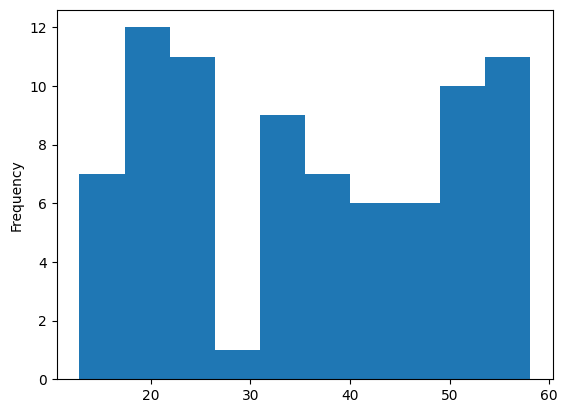

In [51]:
df['price'].plot(kind='hist', bins=10);

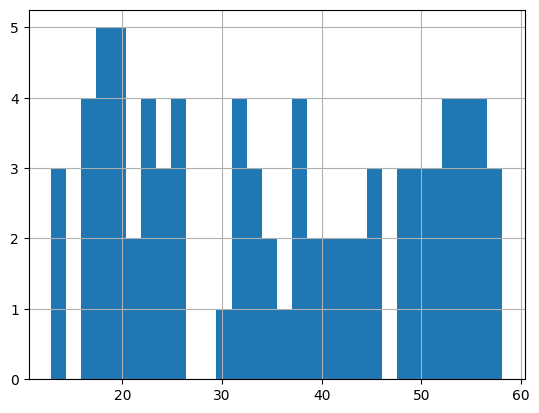

In [52]:
df['price'].hist(bins=30);

In [53]:
df['price'].min()

np.float64(12.84)

In [54]:
df['price'].max()

np.float64(58.11)

In [55]:
rng = df['price'].max() - df['price'].min()

In [56]:
rng

np.float64(45.269999999999996)

In [57]:
rng / 10

np.float64(4.526999999999999)

In [58]:
(df['price'].min(), df['price'].min() + (rng / 10))

(np.float64(12.84), np.float64(17.366999999999997))

In [59]:
df.to_csv('ex_rates.csv', index=False)

In [60]:
df.to_excel('ex_rates.xlsx', index=False)

In [61]:
df = pd.read_csv('ex_rates.csv')
df.head()

,title,price,ranking,url
0,A Light in the Attic,51.77,Three,http://books.toscrape.com/catalogue/a-light-in...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com/catalogue/tipping-th...
2,Soumission,50.10,One,http://books.toscrape.com/catalogue/soumission...
3,Sharp Objects,47.82,Four,http://books.toscrape.com/catalogue/sharp-obje...
4,Sapiens: A Brief History of Humankind,54.23,Five,http://books.toscrape.com/catalogue/sapiens-a-...


Кстати говоря, если перейти по ссылке в саму книгу, там о ней будет куча дополнительной информации. Можно пройтись по всем ссылкам и выкачать себе по ним дополнительную информацию.

## Что делать, если сервер разозлился

* Вы решили собрать себе немного данных
* Сервер не в восторге от ковровой бомбардировки автоматическими запросами
* Error 403, 404, 504, $\ldots$
* Капча, требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик


### а) быть терпеливым

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки

In [62]:
import time
time.sleep(3) # и пусть весь мир подождёт 3 секунды

In [63]:
random_seconds = [3, 5, 7, 10, 12]
np.random.choice(random_seconds)

np.int64(12)

In [64]:
#Общий вариант парсера
infa = []

count = 0
for p in range(1,51):
    count += 1

    try:
        infa.extend(get_page(p))
        time.sleep(3)

    except:
        pass

    if count % 10 == 0:
        df = pd.DataFrame(infa)
        df.to_csv(f'books_{p}.csv', index=False)

### б) быть похожим на человека


Запрос нормального человека через браузер выглядит так:

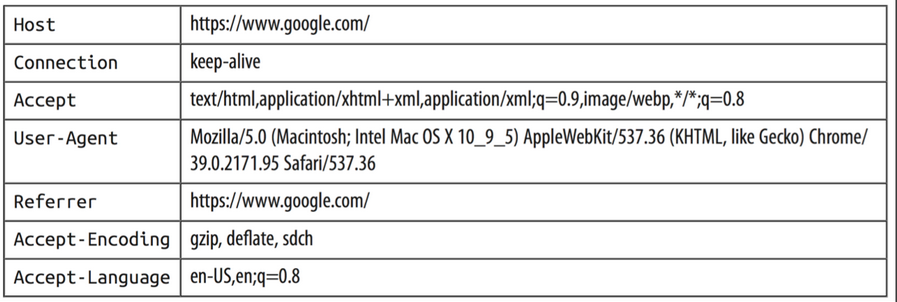

С ним на сервер попадает куча информации! Запрос от питона выглядит так:

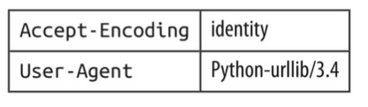

Разница очевидна!  Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными и пустить пыль в глаза сервера при помощи генерации фейкового юзер-агента. Библиотек, которые справляются с такой задачей, существует очень и очень много, лично мне больше всего нравится [fake-useragent.](https://pypi.org/project/fake-useragent/) При вызове метода из различных кусочков будет генерироваться рандомное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос

In [65]:
!pip install fake_useragent


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'

Например, http://www.whatsmyuseragent.com не захочет пускать к себе python и выдаст ошибку 403. Она выдается сервером, если он доступен и способен обрабатывать запросы, но по некоторым личным причинам отказывается это делать.

In [67]:
url = "http://www.whatsmyuseragent.com"

response = requests.get(url)
response

ConnectionError: HTTPSConnectionPool(host='digital.com', port=443): Max retries exceeded with url: /tools/ip-address/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001EEFDAAB750>: Failed to resolve 'digital.com' ([Errno 11001] getaddrinfo failed)"))

А если сгенерировать User-Agent, вопросов у сервера не возникнет.

In [ ]:
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

__Другой пример:__ если захотите спарсить ЦИАН, он начнет вам выдавать капчу. Один из вариантов обхода: менять ip через тор. Однако на практически каждый запрос из-под тора, ЦИАН будет выдавать капчу. Если добавить в запрос `User_Agent`, то капча будет вылезать намного реже.

### в) общаться через посредников

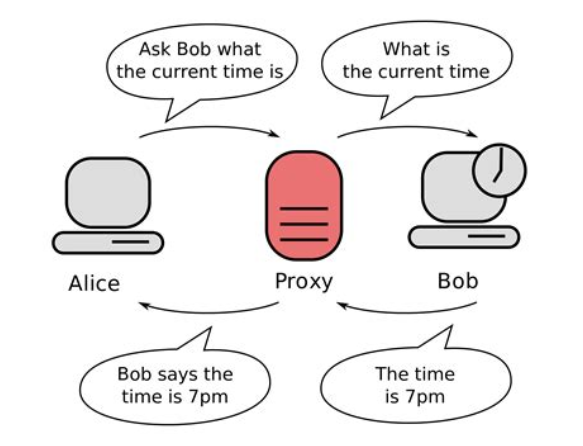

Посмотрим на свой ip-адрес без прокси.

In [63]:
r = requests.get('https://httpbin.org/ip')
print(r.json())

{'origin': '194.106.194.71'}


А теперь попробуем посмотреть, что будет если подключить прокси.

In [ ]:
# proxies = {
#    'http': 'http://proxy.example.com:8080',
#    'https': 'http://secureproxy.example.com:8090',
# }

# r = requests.get('https://httpbin.org/ip', proxies=proxies)

# print(r.json())

Запрос работал немного подольше, ip адрес сменился. Большая часть проксей, которые вы найдёте работают очень нестабильно. Иногда запрос идёт очень долго и выгоднее сбросить его и попробовать другую проксю. Это можно настроить опцией `timeout`.  Например, так если сервер не будет отвечать секунду, код упадёт.

In [ ]:
import requests
requests.get('http://www.google.com', timeout=1)

<Response [200]>

У requests есть довольно много разных интересных примочек. Посмотреть на них можно в [гайде из документации.](https://requests.readthedocs.io/en/master/user/advanced/)


## Хитрости



### Хитрость 1:  Не стесняйтесь пользоваться `try-except`

Эта конструкция позволяет питону в случае ошибки сделать что-нибудь другое либо проигнорировать её. Например, мы хотим найти логарифм от всех чисел из списка:

In [ ]:
from math import log

a = [1,2,3,-1,-5,10,3]

for item in a:
    print(log(item))

У нас не выходит, так как логарифм от отрицательных чисел не берётся. Чтобы код не падал при возникновении ошибки, мы можем его немного изменить:

In [64]:
from math import log

a = [1,2,3,-1,-5,10,3]

for item in a:
    try:
        print(log(item))  # попробуй взять логарифм
    except ValueError:
        print('я не смог') # если не вышло, сознайся и работай дальше

0.0
0.6931471805599453
1.0986122886681098
я не смог
я не смог
2.302585092994046
1.0986122886681098


In [65]:
a / 0

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
a = 10
b = 'a'

try:
    print(a / b)
except ZeroDivisionError:
    print('Деление на 0 запрещено')
    ...
except TypeError:
    print('Деление на другой тип данных запрещено')
    ...

__Как это использовать при парсинге?__  Интернет создаёт человек. У многих людей руки очень кривые. Предположим, что мы на ночь поставили парсер скачивать цены, он отработал час и упал из-за того, что на како-нибудь одной странице были криво проставлены теги, либо вылезло какое-то редкое поле, либо вылезли какие-то артефакты от старой версии сайта, которые не были учтены в нашем парсере. Гораздо лучше, чтобы код проигнорировал эту ошибку и продолжил работать дальше.

### Хитрость 2:  pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/)

In [ ]:
import pandas as pd

df = pd.read_html('https://cbr.ru/currency_base/daily/')[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,597675
1,944,AZN,1,Азербайджанский манат,533819
2,51,AMD,100,Армянских драмов,224788
3,933,BYN,1,Белорусский рубль,282990
4,975,BGN,1,Болгарский лев,504547


Команда пытается собрать в массив все таблички c веб-страницы. Если хочется, можно сначала через bs4 найти нужную таблицу, а потом уже распарсить её:

In [ ]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table))[0]
df.head()

### Хитрость 3:  используйте пакет tqdm

> Код уже работает час. Я вообще без понятия когда он закончит работу. Было бы круто узнать, сколько ещё ждать...

Если в вашей голове возникла такая мысль, пакет `tqdm` ваш лучший друг. Установите его: ```pip install tqdm```

In [ ]:
from tqdm.notebook import tqdm

a = list(range(30))

# 30 раз будем спать по секунде
for i in tqdm(a):
    time.sleep(1)

  0%|          | 0/30 [00:00<?, ?it/s]

Мы обмотали тот вектор, по которому идёт цикл в `tqdm_notebook`. Это даёт нам красивую зелёную строку, которая показывает насколько сильно мы продвинулись по коду. Обматывайте свои самые большие и долгие циклы в `tqdm_notebook` и всегда понимайте сколько осталось до конца.

### Хитрость 4:  распаралеливание

Если сервер не очень настроен вас банить, можно распаралелить свои запросы к нему. Самый простой способ сделать это — библиотека `joblib`.

In [ ]:
from joblib import Parallel, delayed
from tqdm import tqdm_notebook

def simple_function(x):
    return x**2


nj = -1 # паралель на все ядра
result = Parallel(n_jobs=nj)(
                delayed(simple_function)(item)          # какую функцию применяем
                for item in tqdm_notebook(range(10)))   # к каким объектам применям

# tqdm_notebook в последней строчке будет создавать зелёный бегунок с прогрессом

На самом деле это не самый эффективный способ паралелить в python. Он ест много памяти и работает медленнее, чем [стандартный multiprocessing.](https://docs.python.org/3/library/multiprocessing.html)

###  Ещё хитрости

* __Сохраняйте то, что парсите по мере скачивания!__ Прямо внутрь цикла добавьте код, который сохраняет файл!
* Когда код упал в середине списка для скачки, не обязательно запускать его с самого начала. Просто сохраните тот кусок, который уже скачался и дозапустите код с места падения.
* Засовывать цикл для обхода ссылок внутрь функции - не самая хорошая идея. Предположим, что надо обойти $100$ ссылок. Функция должна вернуть на выход объекты, которые скачались по всему этому добру. Она берёт и падает на $50$ объекте. Конечно же то, что уже было скачано, функция не возвращает. Всё, что вы накачали - вы теряете. Надо запускать заново. Почему? Потому что внутри функции своё пространство имён. Если бы вы делали это циклом влоб, то можно было бы сохранить первые $50$ объектов, которые уже лежат внутри листа, а потом продолжить скачку.
* Можно ориентироваться на html-страничке с помощью `xpath`. Он предназначен для того, чтобы внутри html-странички можно было быстро находить какие-то элементы. [Подробнее можно почитать тут.](https://devhints.io/xpath)
* Не ленитесь листать документацию. Из неё можно узнать много полезных штук.

## Домашнее задание

Необходимо написать парсер (с учетом всех озвученных выше особбеностей) и исптать его на одном из сайтов. Если вы не очень "сильный программист", то можно тренироваться на сайте без защиты, а если чувствуете "силу", то можно попытаться спарсить данные с сайта с защитой.